# **EDA on Image Data**

### **What is an Image for a Computer?**

For a computer, an **image** is a structured grid of numerical values that represent visual information. Each value, often called a pixel, corresponds to a small unit of the image and contains information about its color and intensity.

- In **grayscale images**, each pixel is a single value representing brightness, typically ranging from 0 (black) to 255 (white).  
- In **color images**, each pixel is represented by a combination of three values (Red, Green, Blue - RGB), where each value typically ranges from 0 to 255.

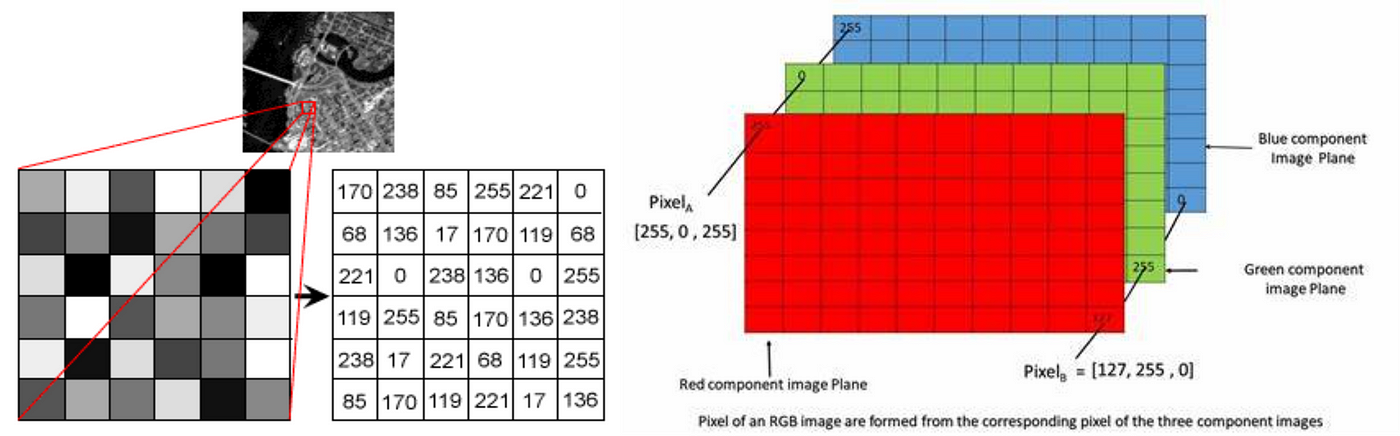

### **Exploring the Dataset**

https://cocodataset.org/#home

**What is the Microsoft COCO Dataset?**

The Microsoft Common Objects in Context (COCO) dataset is the gold standard benchmark for evaluating the performance of state of the art computer vision models. COCO contains over 330,000 images, of which more than 200,000 are labelled, across dozens of categories of objects. COCO is a collaborative project maintained by computer vision professionals from numerous prestigious institutions, including Google, Caltech, and Georgia Tech.

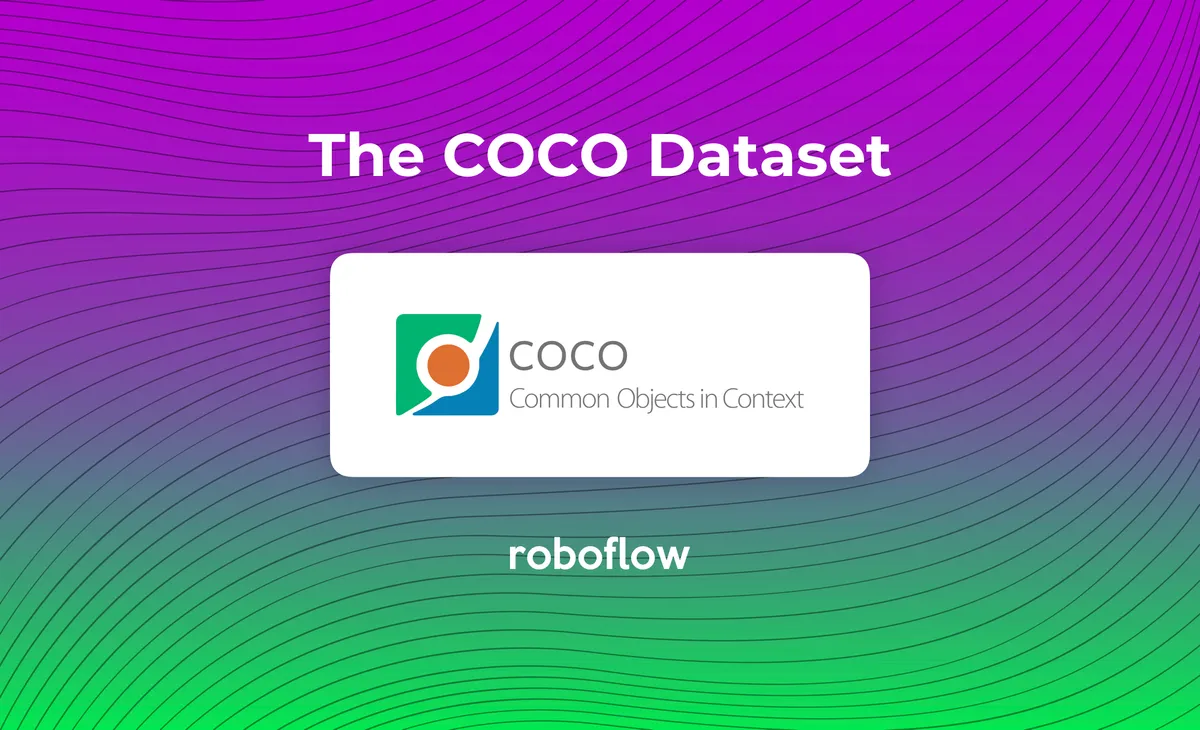

In [1]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -O coco_ann2017.zip

--2025-02-11 06:48:35--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.128.17, 54.231.195.33, 52.217.195.73, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.128.17|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘coco_ann2017.zip’

coco_ann2017.zip    100%[===================>] 241.19M  57.8MB/s    in 4.6s    

2025-02-11 06:48:40 (52.0 MB/s) - ‘coco_ann2017.zip’ saved [252907541/252907541]



In [2]:
!unzip /content/coco_ann2017.zip

Archive:  /content/coco_ann2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [3]:
import random
from pycocotools.coco import COCO

# Load COCO dataset
annotation_file = "/content/annotations/instances_train2017.json"
coco = COCO(annotation_file)

# Get all images and annotations
images = coco.dataset['images']
annotations = coco.dataset['annotations']
categories = coco.dataset['categories']

# Select 200 random images
random.seed(42)  # For reproducibility
selected_images = random.sample(images, 50)

# Get the IDs of the selected images
selected_image_ids = [img['id'] for img in selected_images]

# Filter annotations that correspond to the selected images
selected_annotations = [ann for ann in annotations if ann['image_id'] in selected_image_ids]

# Filter the categories that appear in the selected annotations
selected_category_ids = set(ann['category_id'] for ann in selected_annotations)
selected_categories = [cat for cat in categories if cat['id'] in selected_category_ids]

# Print stats
print(f"Selected number of images: {len(selected_images)}")
print(f"Selected number of annotations: {len(selected_annotations)}")
print(f"Selected number of categories: {len(selected_categories)}")

loading annotations into memory...
Done (t=33.91s)
creating index...
index created!
Selected number of images: 50
Selected number of annotations: 404
Selected number of categories: 58


**Explanation**

This code extracts a random subset of images and their corresponding annotations from the COCO dataset. Here's a step-by-step breakdown:



1. **Load COCO Dataset**:  
   - The COCO dataset is loaded using the annotation file (`instances_train2017.json`) with the `pycocotools.coco.COCO` library.  
   - `coco.dataset` provides access to dataset components:  
     - `images`: Metadata for all images.  
     - `annotations`: Metadata for all annotations.  
     - `categories`: Metadata for all categories.



2. **Select a Subset of Images**:  
   - A random subset of 50 images is selected using `random.sample`.  
   - `random.seed(42)` ensures the selection is reproducible.

3. **Extract Image IDs**:  
   - Extracts the `id` field for each selected image to filter corresponding annotations.



4. **Filter Annotations**:  
   - Filters annotations by checking if the `image_id` of each annotation is in the list of selected image IDs.

5. **Filter Categories**:  
   - Extracts the unique `category_id` values from the filtered annotations.  
   - Retrieves the corresponding category metadata.


6. **Print Summary**:  
   - Displays the number of selected images, annotations, and categories to verify the filtered dataset's size and composition.


Key Outputs

- **Selected Images**: 50 random images and their metadata.  
- **Selected Annotations**: All annotations corresponding to the selected images.  
- **Selected Categories**: Categories present in the selected annotations.

In summary, this code efficiently selects a random subset of the COCO dataset, along with their corresponding annotations and categories, providing a manageable dataset for analysis or modeling tasks.


In [4]:
unique_categories = {}
for category in selected_categories:
  if category['supercategory'] not in unique_categories:
    unique_categories[category['supercategory']] = []
  if category['name'] not in unique_categories[category['supercategory']]:
     unique_categories[category['supercategory']].append(category['name'])

for super_catrgory in unique_categories:
  print(f"{super_catrgory}: {unique_categories[super_catrgory]}")

person: ['person']
vehicle: ['car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat']
outdoor: ['traffic light', 'fire hydrant', 'stop sign', 'bench']
animal: ['bird', 'cat', 'dog', 'elephant', 'giraffe']
accessory: ['backpack', 'umbrella', 'handbag', 'tie', 'suitcase']
sports: ['skis', 'snowboard', 'sports ball', 'kite', 'baseball glove', 'skateboard', 'surfboard']
kitchen: ['bottle', 'cup', 'fork', 'knife', 'spoon', 'bowl']
food: ['apple', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake']
furniture: ['chair', 'couch', 'potted plant', 'dining table']
electronic: ['cell phone']
appliance: ['microwave', 'oven', 'toaster', 'sink', 'refrigerator']
indoor: ['book', 'clock', 'vase', 'teddy bear', 'hair drier', 'toothbrush']


**Explanation**

This code organizes the selected categories into their respective supercategories and prints them. Here's a step-by-step breakdown:


1. **Initialize a Dictionary**:  
   - `unique_categories` is initialized as an empty dictionary to store supercategories as keys and their associated category names as values.

2. **Iterate Through Categories**:  
   - For each category in `selected_categories`:
     - Check if the `supercategory` is already a key in `unique_categories`.  
     - If not, add the `supercategory` key with an empty list as its value.  
     - Append the category's `name` to the list if it is not already included (avoiding duplicates).


3. **Iterate Through Supercategories**:  
   - For each supercategory in `unique_categories`:
     - Print the supercategory name and the associated list of category names.


Key Features

- **Avoids Duplicates**: Ensures each category name appears only once under its supercategory.
- **Organized Output**: Groups categories by their logical hierarchy (`supercategory`).

In summary, this code organizes the selected categories into their respective supercategories, providing a clear hierarchical view of the categories present in the selected dataset.

In [5]:
selected_annotations[0].keys()

dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])

In [6]:
selected_images

[{'license': 1,
  'file_name': '000000068130.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000068130.jpg',
  'height': 429,
  'width': 640,
  'date_captured': '2013-11-16 13:10:08',
  'flickr_url': 'http://farm7.staticflickr.com/6141/6022871891_a601326786_z.jpg',
  'id': 68130},
 {'license': 1,
  'file_name': '000000222195.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000222195.jpg',
  'height': 427,
  'width': 640,
  'date_captured': '2013-11-17 17:09:56',
  'flickr_url': 'http://farm3.staticflickr.com/2219/2039260836_1804afe749_z.jpg',
  'id': 222195},
 {'license': 4,
  'file_name': '000000133386.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000133386.jpg',
  'height': 429,
  'width': 640,
  'date_captured': '2013-11-20 07:28:18',
  'flickr_url': 'http://farm4.staticflickr.com/3572/3656520470_1fc0e5b823_z.jpg',
  'id': 133386},
 {'license': 3,
  'file_name': '000000060513.jpg',
  'coco_url': 'http://images.cocodataset.org/train201

## **Statistical Analysis**

### **Theory: Pixel Intensity Analysis**

**Pixel intensity analysis** is a statistical approach to understanding the distribution and behavior of pixel values within an image. This analysis helps reveal patterns in the data that are useful for image preprocessing, segmentation, and feature extraction in computer vision tasks.

#### Key Components:

1. **Channels in an Image:**
   - In RGB images, there are three color channels: Red (R), Green (G), and Blue (B).
   - Each channel contains intensity values ranging from 0 to 255, representing the brightness or saturation of the respective color.

2. **Flattening Pixel Values:**
   - Pixel values for each channel are flattened into a one-dimensional array to facilitate statistical analysis.
   - This transformation allows the computation of global statistics for each channel.

3. **Statistical Metrics:**
   - **Mean:** The average intensity value of pixels, providing an overall brightness measure.
   - **Standard Deviation (Std):** Indicates how much pixel intensities vary around the mean, reflecting contrast or spread.
   - **Skewness:** Measures asymmetry in the pixel intensity distribution. Positive skew indicates a tail on the right, while negative skew indicates a tail on the left.
   - **Kurtosis:** Measures the "tailedness" of the distribution. High kurtosis indicates sharp peaks and heavy tails, while low kurtosis indicates flatness.

4. **Intensity Distributions:**
   - By aggregating pixel intensities across multiple images for each channel, we can analyze the overall behavior of a dataset (e.g., are red channels generally brighter?).

#### Purpose of Analysis:
- **Insights into Image Characteristics:**
  - The statistics help identify whether the dataset is balanced in terms of brightness and color distribution.
  - High variance or skewness might indicate the presence of outliers or lighting inconsistencies in the dataset.
- **Image Preprocessing:**
  - Adjustments like histogram equalization or normalization can be applied based on the findings to improve model performance.
- **Application in Machine Learning:**
  - Understanding pixel distributions ensures consistent input for algorithms, reducing bias and improving model accuracy.



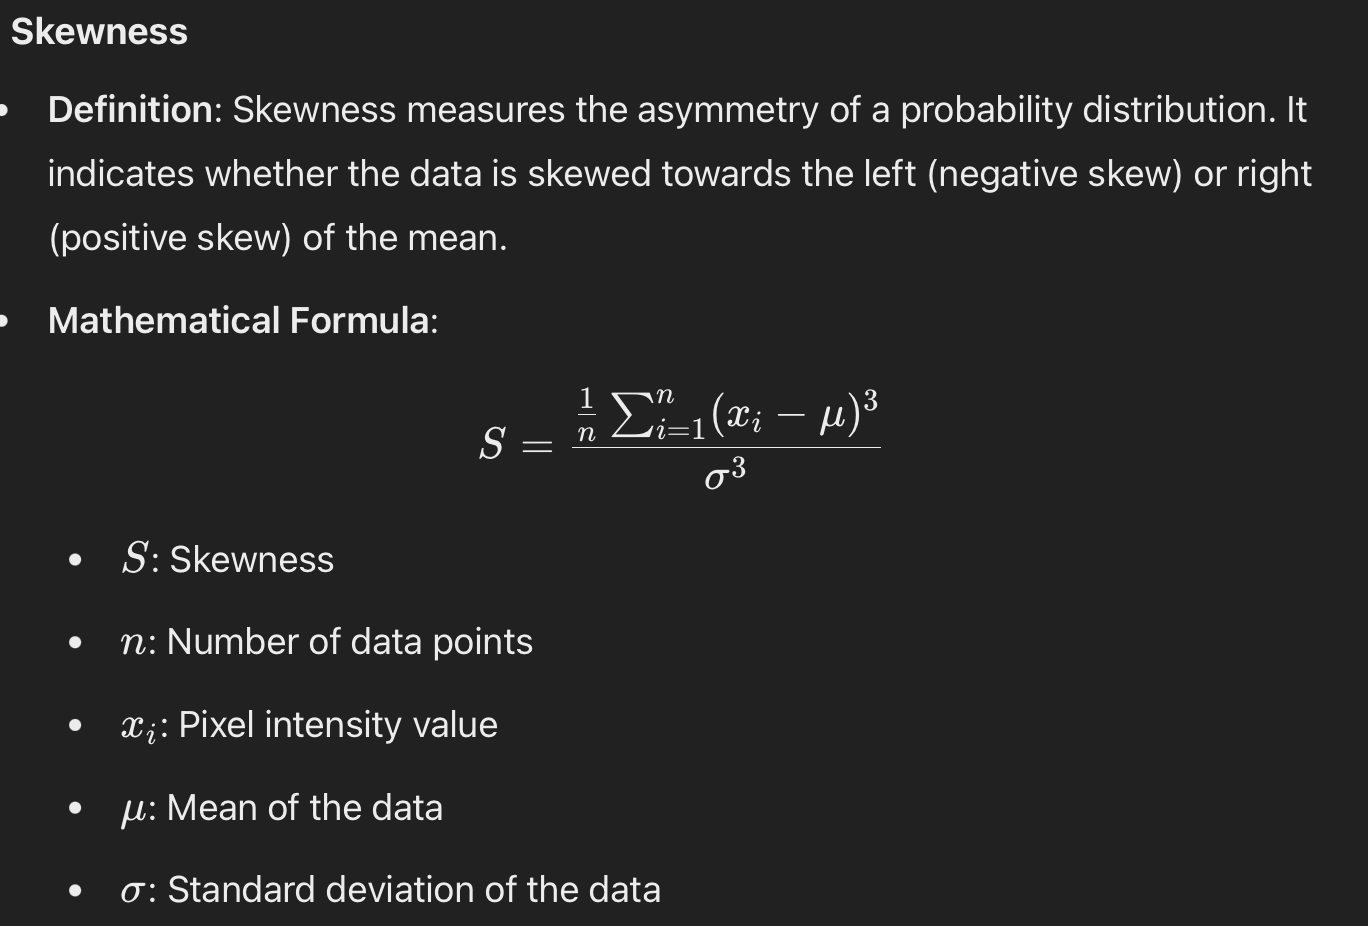

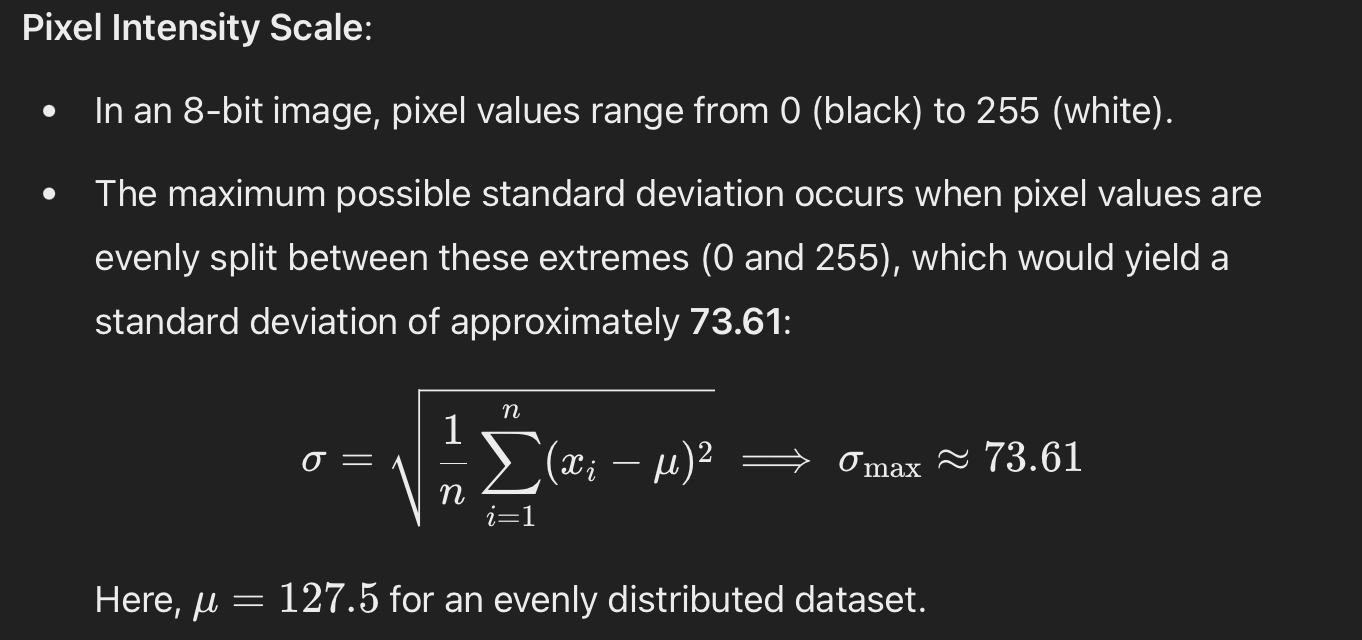

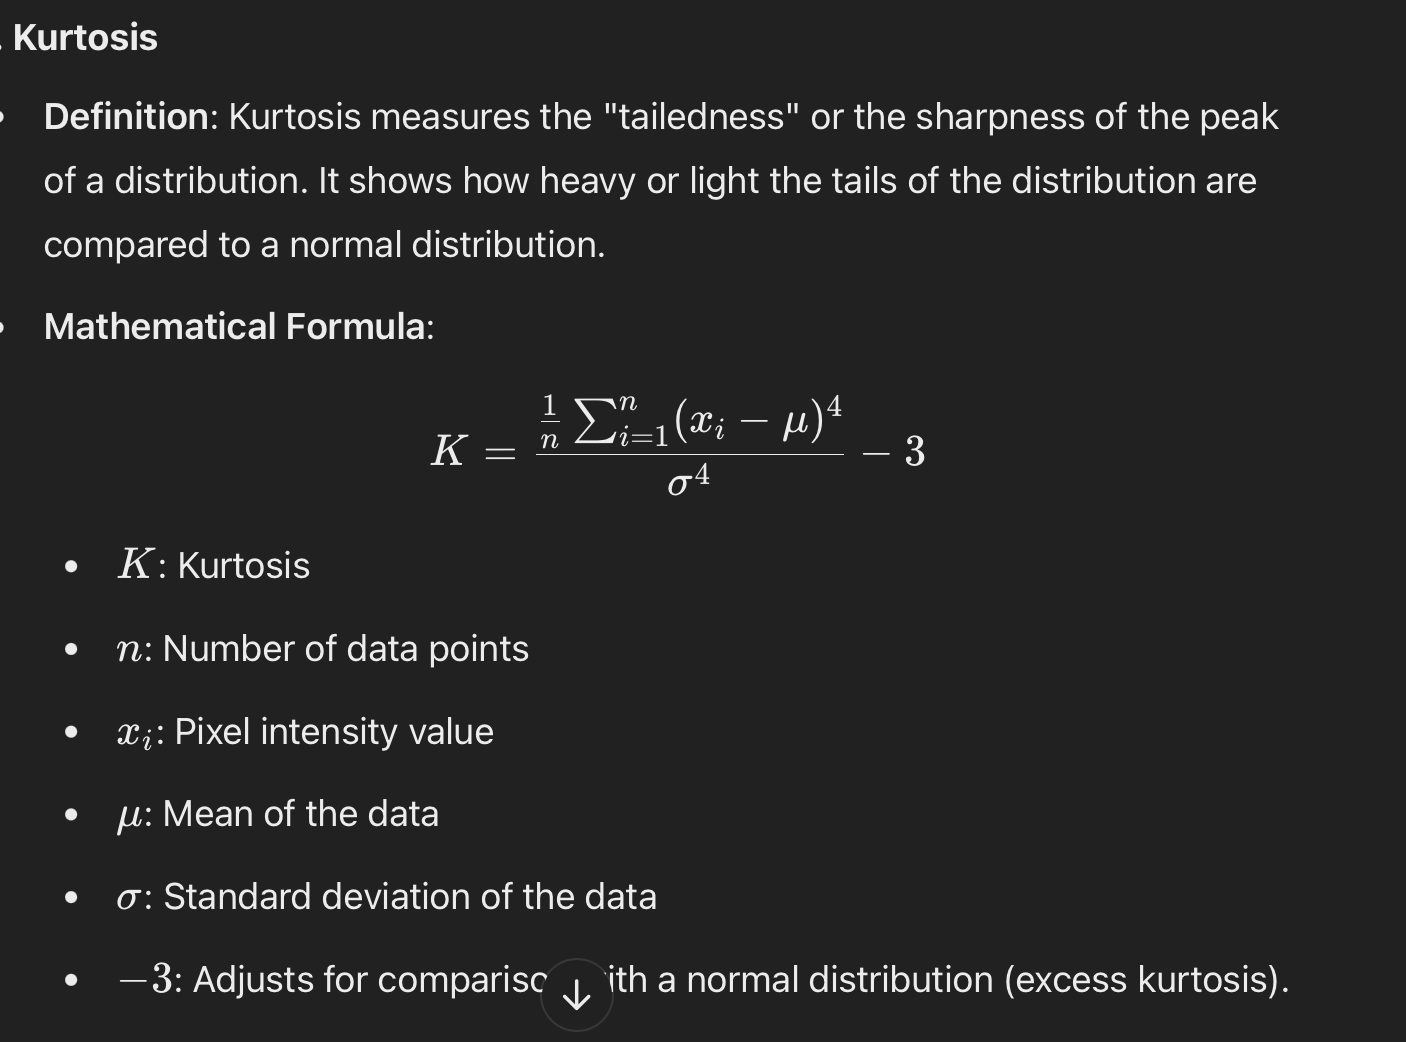

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
import seaborn as sns

def pixel_intensity_analysis(selected_images):
    means, stds, skews, kurtoses = [], [], [], []
    intensity_distributions = {'R': [], 'G': [], 'B': []}

    for image_info in selected_images:
        # Load image
        image = imread(image_info['coco_url'])  # Read directly from coco_url
        if image is not None:
            # Compute per-channel statistics
            for i, channel in enumerate(['R', 'G', 'B']):
                channel_data = image[:, :, i].flatten()
                intensity_distributions[channel].extend(channel_data)
                means.append(np.mean(channel_data))
                stds.append(np.std(channel_data))
                skews.append(skew(channel_data))
                kurtoses.append(kurtosis(channel_data))

    # Summary statistics
    print(f"Mean pixel values (R, G, B): {np.mean(means, axis=0)}")
    print(f"Std pixel values (R, G, B): {np.mean(stds, axis=0)}")
    print(f"Skewness (R, G, B): {np.mean(skews, axis=0)}")
    print(f"Kurtosis (R, G, B): {np.mean(kurtoses, axis=0)}")

pixel_intensity_analysis(selected_images)


Mean pixel values (R, G, B): 120.92563869315602
Std pixel values (R, G, B): 64.71334365657572
Skewness (R, G, B): 0.12161625863878894
Kurtosis (R, G, B): -0.1807936348876289


**Explanation**

This code analyzes pixel intensity distributions for selected images from the COCO dataset, focusing on summary statistics for RGB channels. Here's a step-by-step explanation:


1. **Initialize Data Containers**:  
   - **Statistics**: Lists (`means`, `stds`, `skews`, `kurtoses`) to store summary statistics (mean, standard deviation, skewness, kurtosis) for each channel across all images.  
   - **Distributions**: A dictionary (`intensity_distributions`) to store pixel intensity data for each RGB channel.

2. **Iterate Over Images**:  
   - For each image in `selected_images`:
     - **Load Image**: Images are read directly from their `coco_url` using `imread`.  
     - **Compute Channel Statistics**: Each channel (R, G, B) is processed:
       - Flatten pixel values to a 1D array (`channel_data`).
       - Append pixel values to `intensity_distributions` for further analysis.  
       - Calculate and store mean, standard deviation, skewness, and kurtosis for the channel.

3. **Summary Statistics**:  
   - Averages of the collected statistics across all images are computed and printed for each channel (R, G, B).


Image height range: 360 to 640
Image width range: 375 to 640
Aspect ratio range: 0.67 to 1.78


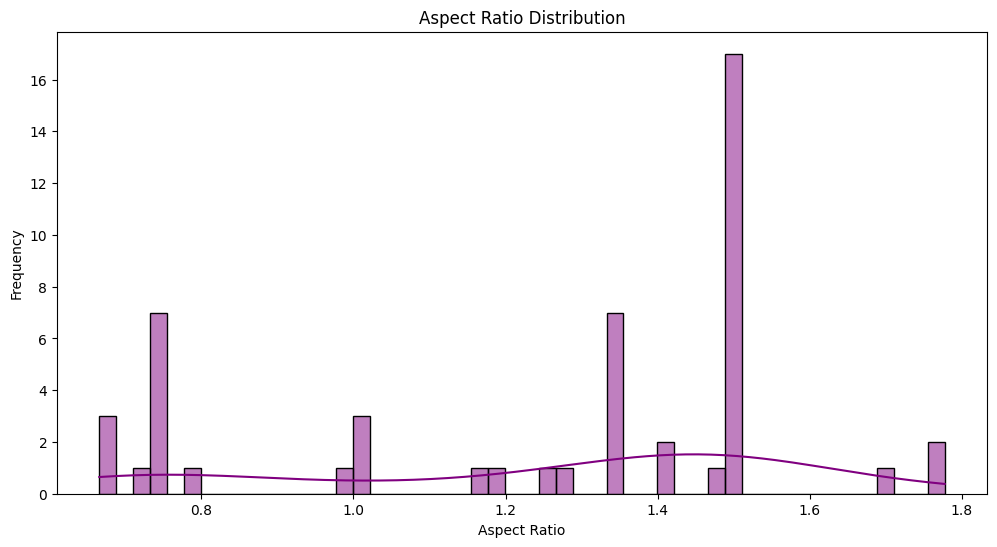

In [ ]:
def image_dimension_analysis(selected_images):
    heights, widths, aspect_ratios = [], [], []

    for image_info in selected_images:
        heights.append(image_info['height'])
        widths.append(image_info['width'])
        aspect_ratios.append(image_info['width'] / image_info['height'])

    # Summary statistics
    print(f"Image height range: {min(heights)} to {max(heights)}")
    print(f"Image width range: {min(widths)} to {max(widths)}")
    print(f"Aspect ratio range: {min(aspect_ratios):.2f} to {max(aspect_ratios):.2f}")

    # Plot distributions
    plt.figure(figsize=(12, 6))
    sns.histplot(aspect_ratios, bins=50, kde=True, color="purple")
    plt.title("Aspect Ratio Distribution")
    plt.xlabel("Aspect Ratio")
    plt.ylabel("Frequency")
    plt.show()

image_dimension_analysis(selected_images)

**Explanation**

This code analyzes image dimensions and aspect ratios for a set of selected images from the COCO dataset. Here's a step-by-step explanation with additional insights about the aspect ratio distribution:


1. **Extract Image Dimensions**:  
   - **Heights**: Extracts the `height` of each image and appends it to the `heights` list.  
   - **Widths**: Extracts the `width` of each image and appends it to the `widths` list.  
   - **Aspect Ratios**: Calculates the aspect ratio (`width / height`) for each image and appends it to the `aspect_ratios` list.

2. **Summary Statistics**:  
   - Calculates and prints the ranges for:
     - **Heights**: Minimum and maximum image heights.  
     - **Widths**: Minimum and maximum image widths.  
     - **Aspect Ratios**: Minimum and maximum aspect ratios, rounded to two decimal places.  
   - **Aspect Ratio Categories**:
     - Portrait-oriented images (`aspect ratio < 1`).  
     - Square-like images (`aspect ratio ≈ 1`).  
     - Landscape-oriented images (`aspect ratio > 1`).  
   - The diversity in aspect ratios highlights the need for careful handling during training, especially for object detection tasks (e.g., YOLO, SSD), as these models are sensitive to variations in aspect ratios.


3. **Aspect Ratio Distribution**:  
   - Plots a histogram of the aspect ratios using Seaborn's `sns.histplot`:  
     - `bins=50`: Divides the range into 50 bins for finer resolution.  
     - `kde=True`: Overlays a Kernel Density Estimate (KDE) curve to show the data's distribution.  
     - `color="purple"`: Sets the histogram color for visual appeal.  

4. **Customize Plot**:  
   - Adds a title (`"Aspect Ratio Distribution"`), labels for the x-axis (`"Aspect Ratio"`) and y-axis (`"Frequency"`), and displays the plot.

Key Insights

- The aspect ratio range indicates a mix of:
  - **Portrait-oriented images** (`aspect ratio < 1`).  
  - **Square-like images** (`aspect ratio ≈ 1`).  
  - **Landscape-oriented images** (`aspect ratio > 1`).  
- Peaks in the distribution:
  - The **peak at 0.8** likely corresponds to portrait images.  
  - The **peak at 1.5** represents landscape images.  
- Bias in Dataset:
  - The dominance of these aspect ratios suggests a significant dataset bias toward these shapes, which could influence model performance in tasks like cropping or feature extraction.




In [ ]:
import cv2
import numpy as np
import os

def preprocess_image_and_annotations(image, annotations, target_size=(256, 256)):

    h, w, c = image.shape

    # Calculate scaling factor
    scale = min(target_size[0] / h, target_size[1] / w)
    new_h, new_w = int(h * scale), int(w * scale)
    resized_image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)

    # Calculate padding
    top = (target_size[0] - new_h) // 2
    bottom = target_size[0] - new_h - top
    left = (target_size[1] - new_w) // 2
    right = target_size[1] - new_w - left

    # Apply padding
    padded_image = cv2.copyMakeBorder(
        resized_image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0]
    )

    # Update annotations
    updated_annotations = []
    for ann in annotations:
        # Extract original bounding box
        x_min, y_min, width, height = ann["bbox"]
        x_max = x_min + width
        y_max = y_min + height

        # Scale coordinates
        x_min = x_min * scale
        x_max = x_max * scale
        y_min = y_min * scale
        y_max = y_max * scale

        # Add padding offsets
        x_min += left
        x_max += left
        y_min += top
        y_max += top

        # Update the annotation
        updated_annotations.append({
            "image_id": ann["image_id"],
            "category_id": ann["category_id"],
            "bbox": [x_min, y_min, x_max - x_min, y_max - y_min],  # Save in COCO format
            "area": (x_max - x_min) * (y_max - y_min),
            "iscrowd": ann["iscrowd"],
        })

    return padded_image, updated_annotations

processed_annotations = []

output_dir = "processed_images"
os.makedirs(output_dir, exist_ok=True)

for image_info in selected_images:
    image = imread(image_info['coco_url'])

    # Filter annotations for this image
    image_annotations = [ann for ann in selected_annotations if ann["image_id"] == image_info['id']]

    processed_image, updated_anns = preprocess_image_and_annotations(image, image_annotations)

    # Save processed image
    output_path = os.path.join(output_dir, image_info['file_name'])
    cv2.imwrite(output_path, processed_image)

    # Save updated annotations
    processed_annotations.extend(updated_anns)


image_dict: {'license': 6, 'file_name': '000000015303.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000015303.jpg', 'height': 378, 'width': 640, 'date_captured': '2013-11-20 23:18:06', 'flickr_url': 'http://farm3.staticflickr.com/2786/5791899950_d793d0a553_z.jpg', 'id': 15303}
selected_image_annotation: {'image_id': 15303, 'category_id': 1, 'bbox': [88.0, 63.892, 69.99600000000001, 61.160000000000004], 'area': 4280.955360000001, 'iscrowd': 0}


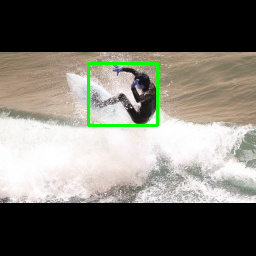

category_id: 1
category_name: person


In [ ]:
# lets visualize one of the processed images and its annotations
def get_dictionary_from_list_by_key(key_value, input_list, input_list_key):
  # Find the dictionary in selected_annotations where 'id' matches selected_id
  result_dict = next((item for item in input_list if item[input_list_key] == key_value), None)
  return result_dict

#1. get the id of the image that has the file_name = 000000015303 (example image we want to display)
image_dict = get_dictionary_from_list_by_key('000000015303.jpg', selected_images, 'file_name')
print(f"image_dict: {image_dict}")
#2. get the annotations of the image that has the id = image_id
selected_image_annotation = get_dictionary_from_list_by_key(image_dict['id'], processed_annotations, 'image_id')
print(f"selected_image_annotation: {selected_image_annotation}")
#3. display the image and its bounding box
from google.colab.patches import cv2_imshow

# Load the image using cv2.imread
image = cv2.imread('/content/processed_images/000000015303.jpg')

# Access bounding box coordinates
x_min, y_min, width, height = selected_image_annotation['bbox']
x_max = x_min + width
y_max = y_min + height

# Draw bounding box on the image
cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)  # Green box, thickness 2

# Display the image with the bounding box
cv2_imshow(image)

#print the label
category_id = selected_image_annotation['category_id']
print(f"category_id: {category_id}")
print(f"category_name: {get_dictionary_from_list_by_key(category_id, selected_categories, 'id')['name']}")

**Explanation**

This code performs preprocessing of images and annotations from the COCO dataset, saves the processed images, and allows visualization of a selected image with its bounding box and category label. Here's a detailed breakdown:

---

####Image and Annotation Preprocessing

1. **Image Preprocessing**:
   - **Scaling**: Resizes images proportionally to fit within a target size (256x256) while maintaining the original aspect ratio.  
   - **Padding**: Adds black borders around the resized image (`cv2.copyMakeBorder`) to ensure uniform dimensions across all images.

2. **Annotation Adjustment**:
   - **Bounding Box Scaling**: Scales the bounding box coordinates to align with the resized image.  
   - **Padding Adjustment**: Adjusts the bounding box coordinates to account for the added padding.  
   - **Save Updated Annotations**: Updated bounding boxes are stored in COCO format (`[x_min, y_min, width, height]`) along with metadata such as `image_id`, `category_id`, and `area`.

3. **Save Processed Data**:
   - **Processed Images**: Saved in the `processed_images` directory.  
   - **Processed Annotations**: Collected in the `processed_annotations` list for subsequent tasks.

---

####Visualization of Processed Images and Annotations

1. **Retrieve Image Metadata**:
   - A helper function, `get_dictionary_from_list_by_key`, retrieves metadata for a specific image based on its `file_name`.

2. **Retrieve Annotations**:
   - Filters the processed annotations to extract the bounding box for the selected image using its `image_id`.

3. **Display Image with Bounding Box**:
   - **Load Image**: The processed image is loaded using `cv2.imread`.  
   - **Draw Bounding Box**: A green rectangle is drawn on the image to represent the bounding box (`cv2.rectangle`).  
   - **Display Image**: The image is displayed with its bounding box using `cv2_imshow`.

4. **Print Category Label**:
   - The category ID is extracted from the annotation and mapped to its name using `get_dictionary_from_list_by_key`.  
   - Prints the `category_id` and its corresponding `category_name`.

---

####Visualization Insights

- The visualization step demonstrates how the bounding box aligns with the processed image.  
- The category label provides additional context about the object in the bounding box.

---


In summary, this code processes COCO images and annotations to a standard size while preserving aspect ratios and updates bounding boxes accordingly. It also enables visualization of processed data to verify correctness.


In [ ]:
def color_composition_analysis(selected_images):
    correlations = []
    shannon_entropies = []

    for image_info in selected_images:
        # Load image
        image = imread(image_info['coco_url'])
        if image is not None:
            # Compute color channel correlations
            R, G, B = image[:, :, 0], image[:, :, 1], image[:, :, 2]
            correlation_matrix = np.corrcoef([R.flatten(), G.flatten(), B.flatten()])
            correlations.append(correlation_matrix)

            # Compute Shannon entropy for each channel
            entropy = lambda channel: -np.sum(np.histogram(channel, bins=256, density=True)[0] * np.log2(
                np.histogram(channel, bins=256, density=True)[0] + 1e-8))
            shannon_entropies.append([entropy(R), entropy(G), entropy(B)])

    avg_correlation = np.mean(correlations, axis=0)
    avg_entropy = np.mean(shannon_entropies, axis=0)

    print(f"Average Color Channel Correlations:\n{avg_correlation}")
    print(f"Average Shannon Entropies (R, G, B): {avg_entropy}")

color_composition_analysis(selected_images)


Average Color Channel Correlations:
[[1.         0.92134976 0.84394765]
 [0.92134976 1.         0.94482624]
 [0.84394765 0.94482624 1.        ]]
Average Shannon Entropies (R, G, B): [7.41554089 7.43381844 7.31448654]


**Explanation**

This code analyzes the color composition of selected images by calculating color channel correlations and Shannon entropy for each channel. Here’s a detailed explanation with additional insights:

---

#### Color Composition Analysis

1. **Initialize Storage**:
   - `correlations`: A list to store correlation matrices of color channels for each image.
   - `shannon_entropies`: A list to store Shannon entropy values for each color channel (R, G, B).

2. **Iterate Through Selected Images**:
   - For each image in `selected_images`:
     - **Load Image**: The image is loaded from its `coco_url` using `imread`.
     - **Compute Color Channel Correlations**:
       - Extract R, G, and B channels from the image.  
       - Compute the correlation matrix using `np.corrcoef`, which measures how the intensity values of channels relate to one another.
     - **Compute Shannon Entropy**:
       - Shannon entropy measures the uncertainty (or information content) of the intensity distribution for each color channel.  
       - Uses `np.histogram` to calculate the probability distribution, and the entropy formula to compute uncertainty.

3. **Calculate Averages**:
   - **Average Correlation**: The mean correlation matrix across all images is computed using `np.mean(correlations, axis=0)`.  
   - **Average Entropy**: The mean Shannon entropy values for R, G, and B channels are computed.

---

#### Outputs

1. **Color Channel Correlations**:
   - The correlation matrix indicates how strongly the intensity of one color channel (e.g., R) is related to another (e.g., G or B).  
   - High correlation values (close to 1) suggest that the channels are similar in intensity distribution.

2. **Shannon Entropies**:
   - Measures the uncertainty in the intensity distribution of each color channel.  
   - Higher entropy values indicate a more uniform and diverse intensity distribution, while lower values indicate concentrated intensity levels.

---

#### Dataset Insights

#### **Dataset Color Relationships**:
- High correlations between channels suggest strong consistency in color intensity patterns across R, G, and B, which is typical for natural image datasets.  
- Slightly lower correlation with Blue hints at less dominance or variation in the Blue channel.

#### **Diversity in Color Channels**:
- The Green channel shows the most detail and variation, followed by Red and then Blue.  
- High entropy values confirm a diverse range of colors in the dataset, which is beneficial for models relying on rich color features.

#### **Potential Impact on Models**:
- Strong correlations between channels may reduce the need for models to treat them as independent features.  
- High color diversity (indicated by entropy) ensures models trained on this dataset can learn robust color-based features, improving performance on tasks like classification or segmentation.

---


In summary, this code provides a quantitative analysis of the color composition in images, offering insights into channel correlations and intensity distributions. The strong correlations and high entropy values indicate a dataset with consistent color patterns and diversity, making it well-suited for models that rely on rich color representations.


In [ ]:
import cv2

def quality_metrics_analysis(selected_images):
    sharpness_scores = []
    blurriness_scores = []

    for image_info in selected_images:
        # Load image
        image = imread(image_info['coco_url'])
        if image is not None:
            gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

            # Compute sharpness using Sobel gradients
            gradient_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
            gradient_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
            sharpness_scores.append(np.sqrt(np.mean(gradient_x**2 + gradient_y**2)))

            # Compute blurriness using variance of Laplacian
            blurriness_scores.append(cv2.Laplacian(gray_image, cv2.CV_64F).var())

    print(f"Average Sharpness: {np.mean(sharpness_scores)}")
    print(f"Average Blurriness (Variance of Laplacian): {np.mean(blurriness_scores)}")

quality_metrics_analysis(selected_images)


Average Sharpness: 121.26338923980508
Average Blurriness (Variance of Laplacian): 2972.6247691010944


**Explanation**

This code evaluates image quality by analyzing sharpness and blurriness metrics for selected images. Here's a detailed explanation:

---

#### Quality Metrics Analysis

1. **Initialize Storage**:
   - `sharpness_scores`: A list to store sharpness values for each image.
   - `blurriness_scores`: A list to store blurriness values for each image.

2. **Iterate Through Selected Images**:
   - For each image in `selected_images`:
     - **Load Image**: The image is loaded from its `coco_url` using `imread`.  
     - **Convert to Grayscale**: The image is converted to grayscale using `cv2.cvtColor`, as sharpness and blurriness metrics are computed on single-channel images.

3. **Compute Sharpness**:
   - Sharpness is measured using Sobel gradients:  
     - **Gradient Calculation**: Compute the horizontal (`gradient_x`) and vertical (`gradient_y`) gradients using `cv2.Sobel`.  
     - **Sharpness Score**: Calculate the square root of the mean of the sum of squared gradients (`np.sqrt(np.mean(gradient_x**2 + gradient_y**2))`).

4. **Compute Blurriness**:
   - Blurriness is measured using the variance of the Laplacian:  
     - **Laplacian Calculation**: Apply `cv2.Laplacian` to the grayscale image to compute second-order derivatives.  
     - **Variance**: Compute the variance of the Laplacian to quantify blurriness (`cv2.Laplacian(gray_image, cv2.CV_64F).var()`).  
     - Lower variance values indicate higher blurriness, while higher values suggest sharper images.

5. **Calculate and Print Averages**:
   - Compute the mean sharpness and blurriness scores across all images.  
   - Print the average sharpness and blurriness values.

---

#### Outputs

1. **Sharpness**:
   - Indicates the clarity of edge details in images.  
   - Higher sharpness scores suggest better-defined edges and clearer images.

2. **Blurriness**:
   - Quantifies the level of blur in images.  
   - Lower variance of Laplacian values indicates more blurry images, while higher values suggest sharper ones.

---


In summary, this code calculates sharpness and blurriness metrics for a set of images, providing insights into their quality. The Sobel gradient method quantifies sharpness, while the variance of the Laplacian measures blurriness. These metrics help evaluate and enhance image datasets for various computer vision tasks.


## **Visualization Analysis**

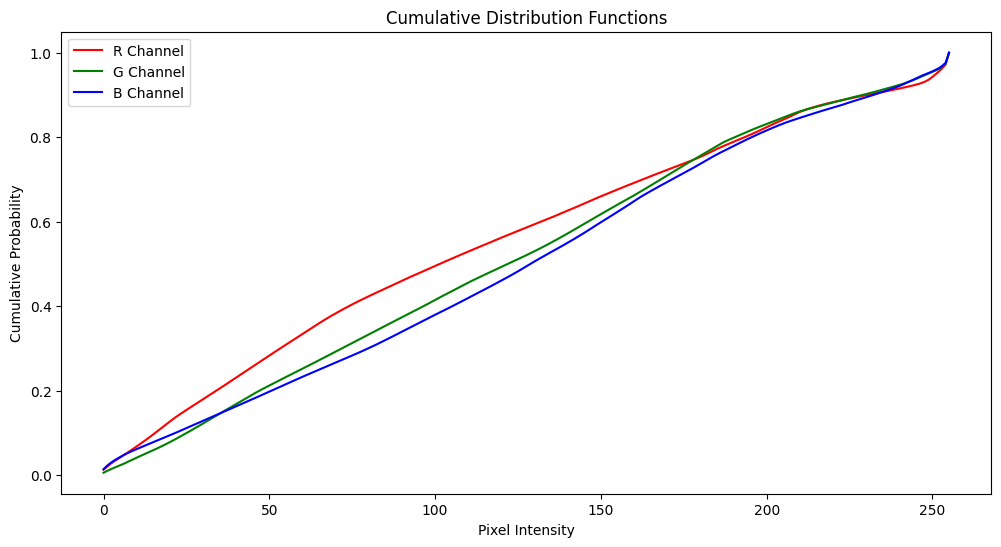

In [ ]:
def plot_cdfs(images):
    """Plots CDFs for the R, G, and B channels."""
    all_pixels = {'R': [], 'G': [], 'B': []}

    for image_info in selected_images:
        # Read image
        img = imread(image_info['coco_url'])
        # Convert to RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Flatten each channel and append
        all_pixels['R'].extend(img_rgb[:, :, 0].flatten())
        all_pixels['G'].extend(img_rgb[:, :, 1].flatten())
        all_pixels['B'].extend(img_rgb[:, :, 2].flatten())

    # Plot CDFs
    plt.figure(figsize=(12, 6))
    for i, color in enumerate(['R', 'G', 'B']):
        hist, bins = np.histogram(all_pixels[color], bins=256, range=(0, 256), density=True)
        cdf = np.cumsum(hist) * (bins[1] - bins[0])
        plt.plot(bins[:-1], cdf, color=color.lower(), label=f'{color} Channel')

    plt.title('Cumulative Distribution Functions')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.show()

# Example usage:
plot_cdfs(selected_images[:5])


**Explanation**

This code plots the Cumulative Distribution Functions (CDFs) of pixel intensities for the R, G, and B channels in a set of selected images. Here's a step-by-step explanation:

---

#### Functionality

1. **Initialize Storage**:
   - `all_pixels`: A dictionary to store flattened pixel intensity values for the R, G, and B channels across all selected images.

2. **Iterate Through Selected Images**:
   - For each image in `selected_images`:
     - **Load Image**: Reads the image from its `coco_url` using `imread`.
     - **Convert to RGB**: Converts the image to RGB format using `cv2.cvtColor`, as OpenCV loads images in BGR by default.
     - **Extract Channel Data**: Flattens the pixel values of each channel (R, G, B) and appends them to the corresponding list in `all_pixels`.

3. **Compute CDFs**:
   - For each channel (R, G, B):
     - **Histogram**: Computes the pixel intensity histogram with 256 bins (0–255 intensity range) using `np.histogram`.  
     - **CDF**: Computes the cumulative distribution function (CDF) by taking the cumulative sum of the histogram (`np.cumsum`) and normalizing it.

4. **Plot CDFs**:
   - Plots the CDFs for the R, G, and B channels with appropriate labels, colors (`r`, `g`, `b`), and axes:
     - **X-Axis**: Pixel intensity (0–255).
     - **Y-Axis**: Cumulative probability (0–1).

---

#### Outputs

1. **CDF Visualization**:
   - The plot shows the cumulative probability of pixel intensities for each color channel:
     - Steeper curves indicate that the majority of pixel values are concentrated within a specific intensity range.
     - Gradual curves suggest a more uniform distribution of pixel intensities.

---


In summary, this code generates CDF plots for pixel intensities of the R, G, and B channels in the dataset. The plots provide insights into the intensity distribution, helping to evaluate color balance and uniformity, which are crucial for preprocessing and model training.


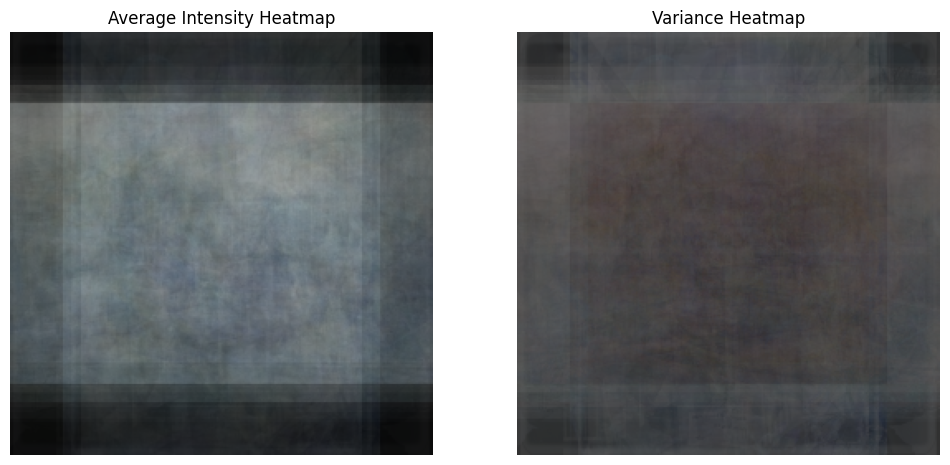

In [ ]:
def generate_heatmaps(image_dir):
    """Generates average and variance heatmaps for spatial patterns."""

    n_images = len(os.listdir(image_dir))
    avg_image = None
    var_image = None

    for image_file in os.listdir(image_dir):
        image_path = os.path.join(image_dir, image_file)
        img_data = cv2.imread(image_path)
        img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB) / 255.0  # Normalize

        if avg_image is None:
            avg_image = np.zeros_like(img_data)
            var_image = np.zeros_like(img_data)

        avg_image += img_data
        var_image += img_data ** 2

    avg_image /= n_images
    var_image = (var_image / n_images) - (avg_image ** 2)

    # Plot heatmaps
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(avg_image)
    plt.title('Average Intensity Heatmap')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(np.sqrt(var_image))
    plt.title('Variance Heatmap')
    plt.axis('off')

    plt.show()

# Example usage:
generate_heatmaps('/content/processed_images')


**Explanation**

This code generates **average intensity** and **variance heatmaps** for images in a specified directory, revealing spatial patterns in the dataset. Here’s a detailed breakdown:

---

#### Heatmap Generation

1. **Initialize Variables**:
   - `avg_image`: Stores the cumulative sum of pixel intensities across all images.
   - `var_image`: Stores the cumulative sum of squared pixel intensities for variance calculation.

2. **Iterate Through Images**:
   - For each image in `image_dir`:
     - **Load Image**: Reads the image using `cv2.imread`.
     - **Normalize**: Converts pixel values to the range [0, 1] by dividing by 255.  
     - **Initialize Accumulators**: On the first iteration, initializes `avg_image` and `var_image` as zero arrays with the same shape as the image.
     - **Update Accumulators**:
       - Add the normalized pixel values to `avg_image`.  
       - Add the squared pixel values to `var_image`.

3. **Compute Average and Variance**:
   - **Average Heatmap**: Divide `avg_image` by the number of images (`n_images`).  
   - **Variance Heatmap**: Compute the variance using the formula:  
     \[
     \text{variance} = \frac{\text{sum of squares}}{n} - \left(\frac{\text{sum}}{n}\right)^2
     \]

---

#### Heatmap Visualization

1. **Plot Heatmaps**:
   - **Average Intensity Heatmap**:
     - Displays the spatial distribution of average pixel intensities across all images.  
   - **Variance Heatmap**:
     - Shows the spatial variability of pixel intensities.  
     - Takes the square root of the variance for better visualization.

2. **Customizations**:
   - Titles: `"Average Intensity Heatmap"` and `"Variance Heatmap"`.  
   - Axis: Turned off (`plt.axis('off')`) for cleaner visuals.

---

#### Outputs

1. **Average Intensity Heatmap**:
   - Highlights regions with consistently higher or lower intensity values across the dataset.  
   - Useful for identifying common spatial patterns.

2. **Variance Heatmap**:
   - Reveals areas with significant intensity variation.  
   - Indicates regions that may contain moving objects, different lighting conditions, or structural diversity.

---

#### Applications

- **Dataset Analysis**:
  - Identify common spatial features and variations in the dataset.
- **Preprocessing**:
  - Inform decisions about data normalization or augmentation based on intensity patterns.
- **Model Training**:
  - Understand areas with potential bias or insufficient diversity, which might impact model performance.

---


In summary, this code computes and visualizes average intensity and variance heatmaps for a set of images. The heatmaps provide insights into spatial patterns and variability in the dataset, which are critical for preprocessing and understanding the data's characteristics.


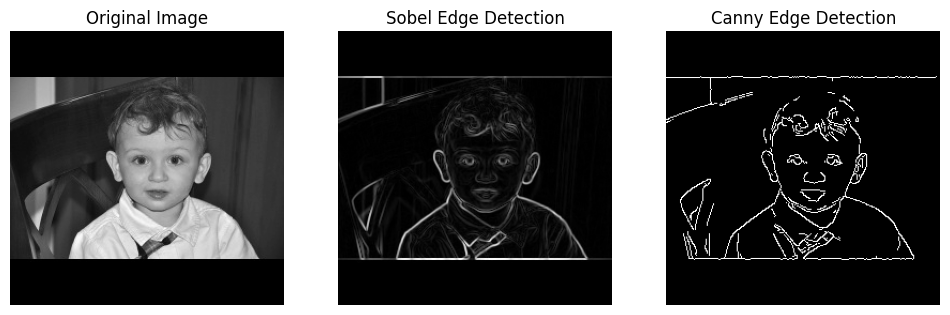

In [ ]:
def visualize_edges(image_path):
    """Displays edges using Sobel and Canny filters."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Sobel edge detection
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    sobel = np.sqrt(sobel_x**2 + sobel_y**2)

    # Canny edge detection
    canny = cv2.Canny(img, 100, 200)

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(sobel, cmap='gray')
    plt.title('Sobel Edge Detection')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(canny, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.axis('off')

    plt.show()

# Example usage:
visualize_edges('/content/processed_images/000000034377.jpg')


**Explanation**

This code visualizes edges in an image using two common edge detection methods: Sobel and Canny filters. Here’s a detailed explanation:

---

#### Edge Detection

1. **Load Image**:
   - The image is loaded in grayscale mode (`cv2.IMREAD_GRAYSCALE`) for edge detection, as edges are intensity-based features.

2. **Sobel Edge Detection**:
   - Sobel filters compute the gradient of the image intensity in the horizontal (x) and vertical (y) directions:
     - **Horizontal Gradient**: `cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)` calculates intensity changes in the x-direction.  
     - **Vertical Gradient**: `cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)` calculates intensity changes in the y-direction.  
   - The overall edge strength is computed as the Euclidean norm of the gradients:  
     \[
     \text{sobel} = \sqrt{\text{sobel}_x^2 + \text{sobel}_y^2}
     \]

3. **Canny Edge Detection**:
   - The Canny filter detects edges by finding intensity gradients that exceed certain thresholds:
     - `cv2.Canny(img, 100, 200)` applies thresholds of 100 and 200 for edge detection.
     - Produces thin edges with better localization compared to Sobel.

---

#### Visualization

1. **Plot Results**:
   - **Original Image**: Displays the original grayscale image for reference.  
   - **Sobel Edge Detection**: Shows edges detected by the Sobel filter, highlighting intensity gradients.  
   - **Canny Edge Detection**: Displays edges detected by the Canny filter, often more refined and localized.

2. **Customizations**:
   - Titles: `"Original Image"`, `"Sobel Edge Detection"`, `"Canny Edge Detection"`.  
   - Axis: Turned off (`plt.axis('off')`) for cleaner visuals.

---

#### Outputs

1. **Sobel Edge Detection**:
   - Highlights edges based on intensity gradients in the x and y directions.  
   - Useful for detecting edges with strong directional components.

2. **Canny Edge Detection**:
   - Produces thin and localized edges, often better suited for feature extraction in image processing tasks.

---

#### Applications

- **Feature Extraction**:
  - Use edge maps as features for tasks like object detection or image segmentation.
- **Dataset Analysis**:
  - Analyze edge patterns in images to understand structural complexity or texture.
- **Preprocessing**:
  - Apply edge detection to simplify images and reduce input complexity for models.

---

In summary, this code applies Sobel and Canny edge detection methods to visualize edges in an image. The visualizations highlight intensity gradients and refined edges, providing insights into the image's structure and features.


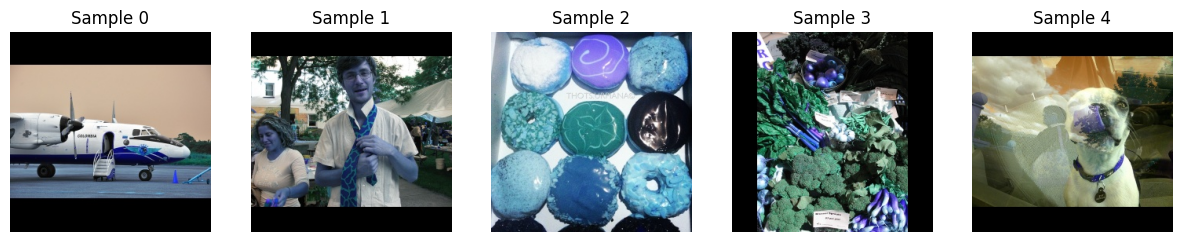

In [ ]:
def display_sample_images(image_dir, n_samples=5):
    """Displays a random set of sample images."""

    # Select image files from the directory
    image_files = os.listdir(image_dir)

    # Limit the number of files to display to n_samples
    selected_image_files = image_files[:n_samples]

    plt.figure(figsize=(15, 10))

    for i, img_file in enumerate(selected_image_files):  # Use selected files
        image_path = os.path.join(image_dir, img_file)
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n_samples, i+1)
        plt.imshow(img_rgb)
        plt.title(f'Sample {i}')
        plt.axis('off')

    plt.show()

# Example usage:
display_sample_images('/content/processed_images', n_samples=5)


**Explanation**

This code displays a random set of sample images from a specified directory, providing a quick overview of the dataset. Here’s a detailed breakdown:

---

#### Functionality

1. **Select Image Files**:
   - Retrieves the list of all image files in the directory (`image_dir`) using `os.listdir`.

2. **Limit to Sample Size**:
   - Selects the first `n_samples` files from the list of images for visualization.

3. **Prepare Visualization**:
   - Creates a figure with a grid layout (`plt.figure`) to display `n_samples` images side by side.  
   - Iterates over the selected images:
     - **Load Image**: Reads the image using `cv2.imread`.  
     - **Convert to RGB**: Converts the image to RGB format using `cv2.cvtColor` since OpenCV loads images in BGR by default.  
     - **Display Image**: Uses `plt.imshow` to display the image.

4. **Customize Plot**:
   - Titles: Each image is labeled as `"Sample {i}"`.  
   - Axis: Turned off (`plt.axis('off')`) for cleaner visuals.

5. **Show Images**:
   - Displays the grid of images using `plt.show`.

---

#### Outputs

1. **Visualized Samples**:
   - Displays a random subset of images in a single row (or grid if modified) to quickly assess the dataset's content.

---

#### Applications

- **Dataset Exploration**:
  - Provides a quick preview of images to verify the dataset's integrity and content.
- **Quality Control**:
  - Helps identify potential issues, such as corrupted or mislabeled images.
- **Preprocessing Validation**:
  - Confirms that preprocessing (e.g., resizing, padding) has been applied correctly.

---


In summary, this code visualizes a subset of images from a specified directory, making it easy to inspect the dataset visually. It provides an efficient way to verify image quality and preprocessing results.


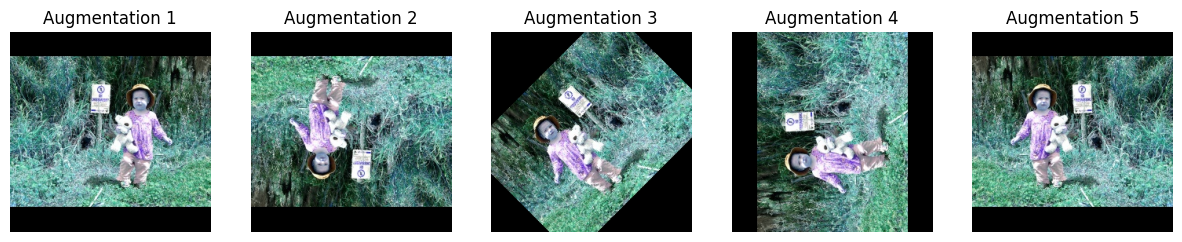

In [ ]:
from torchvision.transforms import functional as F
from PIL import Image

def visualize_augmentations(image_path):
    """Applies and displays data augmentations."""
    img = Image.open(image_path)
    aug_images = [
        F.hflip(img),
        F.vflip(img),
        F.rotate(img, 45),
        F.rotate(img, 90),
        F.resize(img, (256, 256))
    ]

    plt.figure(figsize=(15, 10))
    for i, aug in enumerate(aug_images):
        plt.subplot(1, len(aug_images), i + 1)
        plt.imshow(aug)
        plt.title(f'Augmentation {i+1}')
        plt.axis('off')

    plt.show()

# Example usage:
visualize_augmentations("/content/processed_images/000000543692.jpg")

**Explanation**

This code applies common data augmentation techniques to an image and displays the results, helping visualize the effects of augmentations on the dataset. Here’s a detailed breakdown:

---

#### Augmentations

1. **Load Image**:
   - Opens the image using `PIL.Image.open` to facilitate augmentations.

2. **Apply Augmentations**:
   - Uses transformations from `torchvision.transforms.functional` to apply the following augmentations:
     - **Horizontal Flip (`F.hflip`)**: Mirrors the image horizontally.
     - **Vertical Flip (`F.vflip`)**: Mirrors the image vertically.
     - **Rotation by 45 Degrees (`F.rotate`)**: Rotates the image clockwise by 45 degrees.
     - **Rotation by 90 Degrees (`F.rotate`)**: Rotates the image clockwise by 90 degrees.
     - **Resize (`F.resize`)**: Resizes the image to 256x256 pixels.

3. **Store Augmented Images**:
   - Creates a list, `aug_images`, containing the augmented versions of the image.

---

#### Visualization

1. **Prepare Plot**:
   - Sets up a grid layout (`plt.figure`) with one row and as many columns as there are augmentations.

2. **Display Augmented Images**:
   - Iterates over the augmented images:
     - Displays each image using `plt.imshow`.
     - Labels each image with a corresponding title (`Augmentation {i+1}`).
     - Turns off the axis (`plt.axis('off')`) for cleaner visuals.

3. **Show Plot**:
   - Displays the grid of augmented images using `plt.show`.

---

#### Outputs

1. **Augmented Images**:
   - Displays a series of augmented images to demonstrate the effect of each transformation.

---

### Applications

- **Data Augmentation**:
  - Augmentations increase dataset diversity, reducing overfitting and improving model generalization.
- **Preprocessing Validation**:
  - Ensures augmentations are applied correctly and produce the intended effects.
- **Dataset Exploration**:
  - Helps visualize how augmentations alter the dataset for robustness.

---


In summary, this code applies common image augmentations (flipping, rotation, resizing) and visualizes their effects. It provides insights into how transformations modify the dataset, aiding in augmentation design and validation.


## **Dimensionality Analysis**

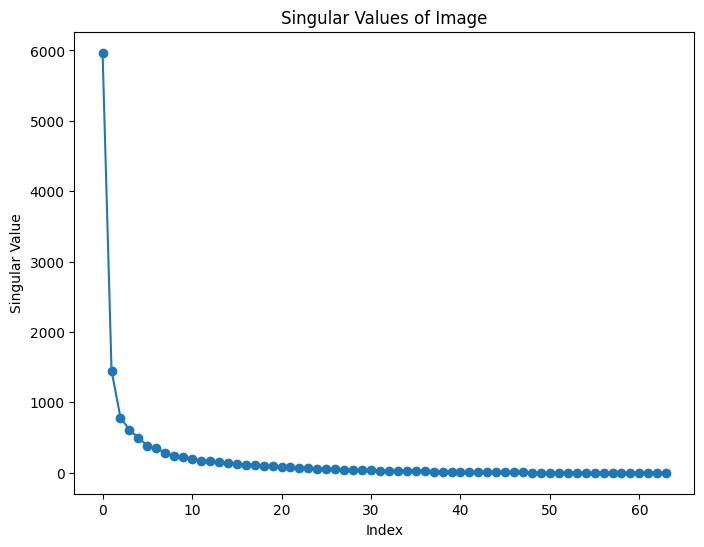

In [ ]:
from numpy.linalg import svd

def apply_svd(image_path):
    """Analyze an image using SVD."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (64, 64))  # Resize for consistency
    U, S, Vt = svd(img_resized, full_matrices=False)

    # Plot singular values
    plt.figure(figsize=(8, 6))
    plt.plot(S, marker='o')
    plt.title('Singular Values of Image')
    plt.xlabel('Index')
    plt.ylabel('Singular Value')
    plt.show()

    return U, S, Vt

# Example usage
U, S, Vt = apply_svd("/content/processed_images/000000283996.jpg")


**Explanation**


The fractal dimension measures the complexity of textures, patterns, or edges in an image. It helps describe how "dense" or "irregular" the structures in an image are.

Fractal dimension helps distinguish between different types of patterns:
Natural patterns (e.g., clouds, trees, coastlines) often have high fractal dimensions due to their irregularity.
Man-made structures (e.g., roads, buildings) tend to have lower fractal dimensions due to their regularity and simplicity.

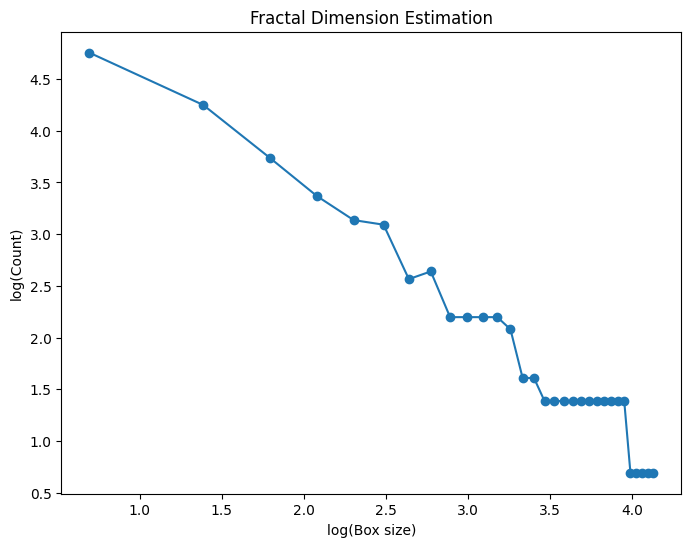

In [ ]:
def fractal_dimension(image_path):
    """Estimate the fractal dimension of an image."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64, 64))  # Resize for consistency
    binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)[1] // 255

    # Box-counting method
    def boxcount(binary, k):
        S = np.add.reduceat(
            np.add.reduceat(binary, np.arange(0, binary.shape[0], k), axis=0),
            np.arange(0, binary.shape[1], k), axis=1
        )
        return len(np.where((S > 0) & (S < k * k))[0])

    sizes = np.arange(2, 64, 2)
    counts = [boxcount(binary, size) for size in sizes]

    # Fit line to log-log plot
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)

    plt.figure(figsize=(8, 6))
    plt.plot(np.log(sizes), np.log(counts), marker='o')
    plt.title('Fractal Dimension Estimation')
    plt.xlabel('log(Box size)')
    plt.ylabel('log(Count)')
    plt.show()

    return -coeffs[0]

# Example usage
fractal_dim = fractal_dimension("/content/processed_images/000000508577.jpg")


## 📚 **Further Reading: Kaggle Notebooks on Image Preprocessing and Color Analysis**

Here are some Kaggle notebooks that delve into image preprocessing and color analysis:

1. **Preprocessing Image Data Using OpenCV**  
   This notebook explores various techniques for preprocessing image data using the OpenCV library, including resizing, normalization, and augmentation.  
   [https://www.kaggle.com/code/tompaulat/preprocessing-image-data-using-opencv](https://www.kaggle.com/code/tompaulat/preprocessing-image-data-using-opencv)

2. **Advanced Image Preprocessing with CLAHE**  
   This notebook demonstrates the use of Contrast Limited Adaptive Histogram Equalization (CLAHE) for enhancing image contrast, which is particularly useful in medical imaging.  
   [https://www.kaggle.com/code/kyleberdy/advanced-image-preprocessing-with-clahe](https://www.kaggle.com/code/kyleberdy/advanced-image-preprocessing-with-clahe)

3. **Pixels, Brightness and Color Analysis - Image Data**  
   This notebook provides an analysis of pixel intensity distributions, brightness levels, and color compositions in images, offering insights into image characteristics.  
   [https://www.kaggle.com/code/vikassheoran/pixels-brightness-and-color-analysis-image-data](https://www.kaggle.com/code/vikassheoran/pixels-brightness-and-color-analysis-image-data)



Here are some research papers that delve into image preprocessing and color analysis:

1. **A Brief Survey of Color Image Preprocessing and Segmentation Techniques**  
   This paper provides a comprehensive overview of various methods used in color image preprocessing and segmentation, discussing both classical and non-classical approaches.  
   [https://www.researchgate.net/publication/236268434_A_Brief_Survey_of_Color_Image_Preprocessing_and_Segmentation_Techniques](https://www.researchgate.net/publication/236268434_A_Brief_Survey_of_Color_Image_Preprocessing_and_Segmentation_Techniques)

2. **Deep Learning Models for Digital Image Processing: A Review**  
   This review explores the application of deep learning models in digital image processing, covering tasks such as denoising, enhancement, segmentation, feature extraction, and classification.  
   [https://link.springer.com/article/10.1007/s10462-023-10631-z](https://link.springer.com/article/10.1007/s10462-023-10631-z)

3. **A Study on Various Image Processing Techniques**  
   This study examines different image processing techniques aimed at removing noise and enhancing images, including contrast limited adaptive histogram equalization and various filtering methods.  
   [https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3388008](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3388008)
